In [13]:
import torch
import torch.nn as nn
import Datasets
from RNNEncoder import RNNEncoder
from Conv3DRNNCell import Conv3DGRUCell
from ADHDClassifier import ADHDClassifier
import utils
import time
import numpy as np
import sklearn.metrics
import matplotlib

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Device: ", device)

torch.backends.cudnn.benchmark = True  # set False whenever input size varies

batch_size = 64

Device:  cuda:0


In [3]:
testset = Datasets.ADHDFeatureDataset('/home/agajan/test_feature_tensors_4d/',
                                      csv_file='/home/agajan/DeepMRI/adhd_testset.csv',
                                      seq_len=50,
                                      binary=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=1)
print("Total test examples: ", len(testset))

171 94
Total test examples:  171


In [4]:
rnn_encoder = RNNEncoder(
    Conv3DGRUCell,
    input_channels=64,
    hidden_channels=128,
    kernel_size=3,
    stride=1,
    padding=1,
    hidden_kernel_size=3
)
rnn_encoder.to(device)
rnn_encoder.load_state_dict(torch.load('models/final_adam_rnn_encoder_401'))

classifier = ADHDClassifier(128, 7, 8, 6, num_labels=2, p=0.0)
classifier.to(device)
classifier.load_state_dict(torch.load('models/final_adhd_classifier'))

criterion = nn.CrossEntropyLoss()

In [5]:
labels, preds = utils.evaluate_adhd_classifier(classifier, rnn_encoder, criterion, testloader, device)

Total examples: 171, Loss: 0.65652, Accuracy: 0.65497


In [6]:
np.sum(labels == preds) / len(preds)

0.6549707602339181

Confusion matrix, without normalization


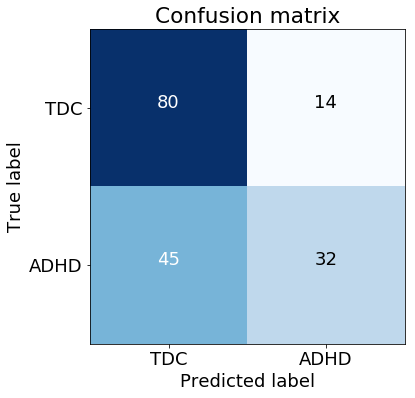

In [17]:
cm = sklearn.metrics.confusion_matrix(labels, preds, labels=range(2))
matplotlib.rcParams.update({'font.size': 18})
utils.plot_confusion_matrix(cm, classes=('TDC', 'ADHD'), normalize=False)

In [8]:
np.sum(labels == 0)

94

In [9]:
np.sum(labels == 1)

77

In [18]:
sklearn.metrics.precision_score(labels, preds)

0.6956521739130435

In [19]:
sklearn.metrics.accuracy_score(labels, preds)

0.6549707602339181

In [20]:
sklearn.metrics.recall_score(labels, preds)

0.4155844155844156

In [21]:
sklearn.metrics.f1_score(labels, preds)

0.5203252032520326